In [38]:
## CSIS 44620 Web Mining and Applied Natural Language Processing
## homework for Module 6
## Presented by Ramon Torres
## DEC 1, 2022

In [39]:
## 1 Prepararing access, Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)
import requests
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
print(response.status_code)
print(response.headers['content-type'])


200
text/html; charset=UTF-8


In [41]:
from bs4 import BeautifulSoup

parser = 'html.parser'

soup = BeautifulSoup(response.text, parser)


In [42]:
for header in soup.findAll('h1'):
    print('h1 header:', header)
    print('h1 text:', header.text)

h1 header: <h1 class="site-title">
<a href="https://web.archive.org/web/20210327165005/https://hackaday.com/" rel="home">Hackaday</a>
</h1>
h1 text: 
Hackaday

h1 header: <h1 class="entry-title" itemprop="name">How Laser Headlights Work</h1>
h1 text: How Laser Headlights Work
h1 header: <h1 class="screen-reader-text">Post navigation</h1>
h1 text: Post navigation
h1 header: <h1 class="widget-title">Search</h1>
h1 text: Search
h1 header: <h1 class="widget-title">Never miss a hack</h1>
h1 text: Never miss a hack
h1 header: <h1 class="widget-title">Subscribe</h1>
h1 text: Subscribe
h1 header: <h1 class="widget-title">If you missed it</h1>
h1 text: If you missed it
h1 header: <h1 class="widget-title">Our Columns</h1>
h1 text: Our Columns
h1 header: <h1 class="widget-title">Search</h1>
h1 text: Search
h1 header: <h1 class="widget-title">Never miss a hack</h1>
h1 text: Never miss a hack
h1 header: <h1 class="widget-title">Subscribe</h1>
h1 text: Subscribe
h1 header: <h1 class="widget-title">I

In [43]:
##1 and 2 Read in your article's html source from the file you created in question 1 and print it's text (use .get_text())
article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

In [44]:
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

In [45]:
soup = BeautifulSoup(article_html, parser)

In [46]:
article_element = soup.find('article').get_text()


In [47]:
print(article_element)
##.get_text()



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

In [48]:
## 3. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
## 3. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element)

## Check for polarity for BONUS Points
print(f'Polarity: {doc._.polarity}')

Polarity: 0.1325758769416858


## Polarity calcularion added, showing positive value of 0.13257, showing some positive sentiment.

In [65]:
#3 Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element)

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print(word_freq.most_common(10))

[('laser', 29), ('headlights', 17), ('technology', 10), ('headlight', 10), ('LED', 10), ('light', 9), ('high', 8), ('beam', 7), ('Laser', 6), ('automotive', 6)]


In [49]:
# 3. Define the following methods and following on 3 to find details about the articles, such as tokens, frequent words and lemmas
non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)
print(non_ws_tokens)

[How, Laser, Headlights, Work, 130, Comments, by, :, Lewin, Day, March, 22, ,, 2021, When, we, think, about, the, onward, march, of, automotive, technology, ,, headlights, are, n’t, usually, the, first, thing, that, come, to, mind, ., Engines, ,, fuel, efficiency, ,, and, the, switch, to, electric, power, are, all, more, front, of, mind, ., However, ,, that, does, n’t, mean, there, are, n’t, thousands, of, engineers, around, the, world, working, to, improve, the, state, of, the, art, in, automotive, lighting, day, in, ,, day, out, ., Sealed, beam, headlights, gave, way, to, more, modern, designs, once, regulations, loosened, up, ,, while, bulbs, moved, from, simple, halogens, to, xenon, HIDs, and, ,, more, recently, ,, LEDs, ., Now, ,, a, new, technology, is, on, the, scene, ,, with, lasers, !, Laser, Headlights, ?, !, BWM, ’s, prototype, laser, headlight, assemblies, undergoing, testing, ., The, first, image, brought, to, mind, by, the, phrase, “, laser, headlights, ”, is, that, of, l

In [50]:
def we_care_about(token):
    return not (token.is_space or token.is_punct)

interesting_tokens = [token for token in doc if we_care_about(token)]
print(interesting_tokens)

[How, Laser, Headlights, Work, 130, Comments, by, Lewin, Day, March, 22, 2021, When, we, think, about, the, onward, march, of, automotive, technology, headlights, are, n’t, usually, the, first, thing, that, come, to, mind, Engines, fuel, efficiency, and, the, switch, to, electric, power, are, all, more, front, of, mind, However, that, does, n’t, mean, there, are, n’t, thousands, of, engineers, around, the, world, working, to, improve, the, state, of, the, art, in, automotive, lighting, day, in, day, out, Sealed, beam, headlights, gave, way, to, more, modern, designs, once, regulations, loosened, up, while, bulbs, moved, from, simple, halogens, to, xenon, HIDs, and, more, recently, LEDs, Now, a, new, technology, is, on, the, scene, with, lasers, Laser, Headlights, BWM, ’s, prototype, laser, headlight, assemblies, undergoing, testing, The, first, image, brought, to, mind, by, the, phrase, laser, headlights, is, that, of, laser, beams, firing, out, the, front, of, an, automobile, Obviousl

In [51]:
from collections import Counter
word_freq = Counter(map(str,interesting_tokens))
print(word_freq.most_common(10))

[('the', 68), ('to', 37), ('of', 36), ('laser', 29), ('in', 24), ('a', 24), ('and', 18), ('headlights', 17), ('that', 13), ('’s', 13)]


In [66]:
#3 Finding most common tokens
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print(word_freq.most_common(10))

[('laser', 29), ('headlights', 17), ('technology', 10), ('headlight', 10), ('LED', 10), ('light', 9), ('high', 8), ('beam', 7), ('Laser', 6), ('automotive', 6)]


In [54]:
#4 Finding most common lemmas
interesting_lemmas = [token.lemma_ for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(10))

[('laser', 34), ('headlight', 27), ('beam', 12), ('led', 11), ('technology', 10), ('light', 10), ('high', 9), ('come', 7), ('Laser', 6), ('automotive', 6)]


In [55]:
## 5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

interesting_token = list()
for token, freq in word_freq.most_common(5):
    interesting_token.append(token)

interesting_lemma = set()
for lemma, freq in lemma_freq.most_common(5):
    interesting_lemma.add(lemma)

sentences = list(doc.sents)
stringlist = list()
nmwrds = list()
for sentence in sentences:
    scount = 0
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    stringlist.append(sent_str)
    for token in sentence:
        if not(token.is_space or token.is_punct):
            scount +=1
    nmwrds.append(scount)

def score_sentence_by_token(sentence, interesting_token):
    tcount = 0
    for token in sentences[sentence]:
        if token.text.lower() in interesting_token:
            tcount += 1
    if tcount == 0:
        print('No interesting tokens')
    tscore = tcount/nmwrds[sentence]
    print('sentence:',stringlist[sentence], 'tokens:',tcount,'words:',nmwrds[sentence],'score:',tscore)

def score_sentence_by_lemma(sentence, interesting_lemma):
    lcount = 0
    for token in sentences[1]:
        if token.lemma_.lower() in interesting_lemma:
            lcount += 1
    if lcount == 0:
        print('No interesting lemmas')
    lscore = lcount/nmwrds[sentence]
    print('sentence:',stringlist[sentence], 'lemmas:',lcount,'words:',nmwrds[sentence],'score:',lscore)
    
score_sentence_by_token(1, interesting_token)
score_sentence_by_lemma(1, interesting_lemma)



sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. tokens: 2 words: 21 score: 0.09523809523809523
sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. lemmas: 2 words: 21 score: 0.09523809523809523


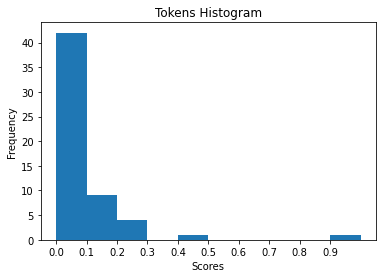

In [56]:
#6 Visualating scores tokens using histograms

import matplotlib.pyplot as plt
import numpy as np
nmtkns = list()
tscores = list()
for sentence in sentences:
    tcount = 0
    for token in sentence:
        if token.text.lower() in interesting_token:
            tcount +=1
    nmtkns.append(tcount)
for i in nmwrds:
    tscores = [t/w for t,w in zip(nmtkns,nmwrds)]

x = np.array(tscores)  
plt.hist(x)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Tokens Histogram')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

## Top range from 0 to 0.1

(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 BarContainer objects>)

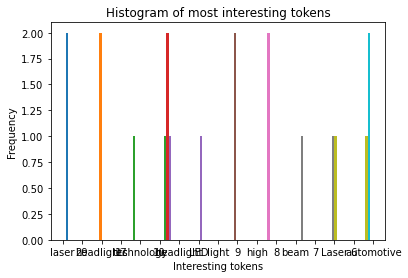

In [57]:
## 6 Added for bonus: Make a list containing frequent words(using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
plt.xlabel('Interesting tokens')
plt.ylabel('Frequency')
plt.title('Histogram of most interesting tokens')
plt.hist(word_freq.most_common(10))

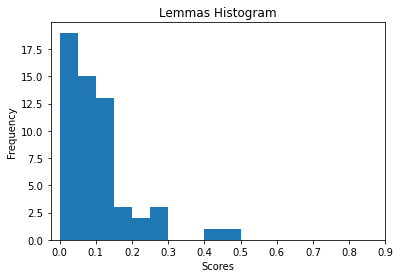

In [58]:
#7 Visualating lemmas tokens using histograms

import matplotlib.pyplot as plt
import numpy as np

nmlmas = list()
lscores = list()
for sentence in sentences:
    lcount = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_lemma:
            lcount +=1
    nmlmas.append(lcount)
for i in nmlmas:
    lscores = [t/w for t,w in zip(nmlmas,nmwrds)]

x = np.array(lscores)  
plt.hist(x)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Lemmas Histogram')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

## Top range from 9 to  0.05

In [59]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(10))

[('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10), ('light', 10), ('high', 9), ('come', 7), ('automotive', 6), ('design', 6)]


(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 BarContainer objects>)

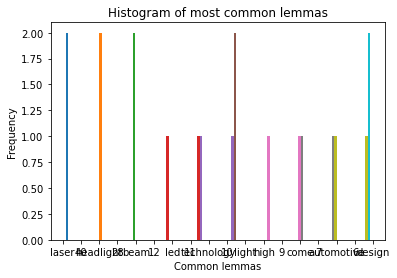

In [60]:
## 7 Added for bonus. Make a list containing frequent words (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
plt.xlabel('Common lemmas')
plt.ylabel('Frequency')
plt.title('Histogram of most common lemmas')
plt.hist(lemma_freq.most_common(10))

In [61]:
#8 Interesting words and lemmas
cool_words = set()
for lemma, freq in lemma_freq.most_common(5):
    cool_words.add(lemma)
print(cool_words)

{'led', 'beam', 'technology', 'laser', 'headlight'}


In [62]:
#8 Interesting words and lemmas as nouns
noun_tokens = [token.text for token in doc if token.pos_ == "NOUN"]
noun_freq = Counter(map(str,noun_tokens))
print(noun_freq.most_common(5))

[('laser', 29), ('headlights', 17), ('technology', 10), ('headlight', 8), ('beam', 7)]


## 8 First five are nouns, laser, headlights, technology, beam.

In [ ]:
## 8 Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words? How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

In [63]:
## 8 Addes for bonus:  Will need to tokenize using  nlkt, while searching some additional sources, 
## Pythons NLTK or ToolKit has a number of functions that allow us to extract various information from a text. found nltk to segragate nouns in a sentence for example:
## Sample code
import nltk
lines = 'Natural processinng language applications are useful'
# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(lines)
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

print(nouns)


['Natural', 'processinng', 'language', 'applications']
